In [30]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = 12, 5
plt.rcParams['lines.markeredgewidth'] = 1

import warnings
warnings.filterwarnings('ignore')

In [31]:
colnames = ['Date', 'Time', 'Ph_number', 'Ph_postcode', 'YOB', 'Gender', 'CNK', 'Product', 'ATC', 'Units', 'Price', 'Contribution']
df_all = pd.read_csv("ds.csv", names=colnames)

In [32]:
df_br = df_all.loc[df_all['Ph_postcode'] == 10].reset_index(drop=True)
df_br.shape

(3804115, 12)

In [18]:
### Dropping unnecessary indexes

In [33]:
df_dead = ((df_br['YOB'] < 1900) | (df_all['YOB'] > 2020))
df_br.drop (df_br[df_dead].index, inplace=True)
df_br.reset_index(drop=True,inplace=True)
df_br.shape

(3799363, 12)

In [34]:
df_gend = (df_br['Gender'] == 0)
df_br.drop (df_br[df_gend].index, inplace=True)
df_br.reset_index(drop=True,inplace=True)
df_br.shape

(3799271, 12)

In [ ]:
### Calculating combined price

In [35]:
df_br['Total Price'] = df_br['Units'] * df_br['Price']
df_br.head()
### Can remove the cases in which Units is 0 but that decreases the dataframe by 30% of its content

,Date,Time,Ph_number,Ph_postcode,YOB,Gender,CNK,Product,ATC,Units,Price,Contribution,Total Price
0,01/01/2017,00:00,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,6.15
1,01/01/2017,00:00,8272695,10,1933,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,6.15
2,01/01/2017,00:00,7341765,10,1964,1,4004693,HONORARIUM BEGELEIDING GASVORMIGE ZUURSTOFTHER...,,0,12.34,0.00,0.00
3,01/01/2017,00:00,7972989,10,1968,1,4004693,HONORARIUM BEGELEIDING GASVORMIGE ZUURSTOFTHER...,,0,12.34,0.00,0.00
4,01/01/2017,00:00,7972989,10,1966,1,4005187,ZUURSTOF STAANGELD MET OF ZONDER ONTSP LEVERAN...,,0,22.16,0.00,0.00


In [36]:
dict_genders = {1:'Male', 2: 'Female'}
df_br['Gender'] = df_br['Gender'].map(dict_genders)

In [ ]:
### Transforming Date to be able to compare purchases per hour/month/year

In [37]:
df_br['Date'] = pd.to_datetime(df_br['Date'])

In [40]:
df_br['Month'] = df_br['Date'].dt.month
df_br['Hour'] = df_br['Time'].str[0:2]
df_br

,Date,Time,Ph_number,Ph_postcode,YOB,Gender,CNK,Product,ATC,Units,Price,Contribution,Total Price,Month,Hour
0,2017-01-01,00:00,9111423,10,1931,Male,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,6.15,1,00
1,2017-01-01,00:00,8272695,10,1933,Male,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39,6.15,1,00
2,2017-01-01,00:00,7341765,10,1964,Male,4004693,HONORARIUM BEGELEIDING GASVORMIGE ZUURSTOFTHER...,,0,12.34,0.00,0.00,1,00
3,2017-01-01,00:00,7972989,10,1968,Male,4004693,HONORARIUM BEGELEIDING GASVORMIGE ZUURSTOFTHER...,,0,12.34,0.00,0.00,1,00
4,2017-01-01,00:00,7972989,10,1966,Male,4005187,ZUURSTOF STAANGELD MET OF ZONDER ONTSP LEVERAN...,,0,22.16,0.00,0.00,1,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799266,2019-12-31,22:54,7056069,10,1952,Male,2734531,"COVERSYL PLUS COMP 90X10MG/2,5MG",C09BA04,90,40.49,5.35,3644.10,12,22
3799267,2019-12-31,22:54,7831362,10,1952,Male,2734531,"COVERSYL PLUS COMP 90X10MG/2,5MG",C09BA04,90,40.49,5.35,3644.10,12,22
3799268,2019-12-31,22:54,7831362,10,1956,Male,5520523,WACHTHONORARIUM,,0,5.05,0.00,0.00,12,22
3799269,2019-12-31,22:54,7056069,10,1954,Male,895540,MEDROL COMP 20X32MG,H02AB04,20,14.95,0.00,299.00,12,22


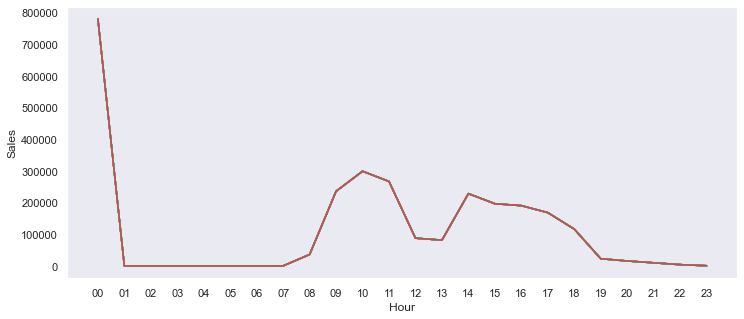

In [45]:
### Checking sales per hour
hours = [hour for hour, df in df_br.groupby('Hour')]

plt.plot(hours, df_br.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [46]:
### Can clean up the data from the 00:00 sales as they are presumably not sufficiently filled in information,
### however that is a huge portion of the df

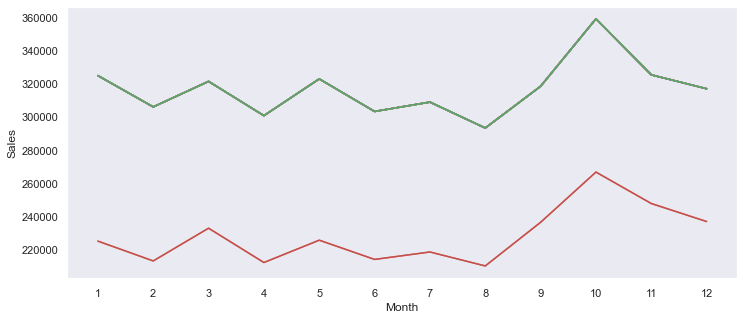

In [49]:
month = [month for month, df in df_br.groupby('Month')]

plt.plot(month, df_br.groupby(['Month']).count())
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [ ]:
### Sales of medicine spikes drastically around October and stays high during early winter